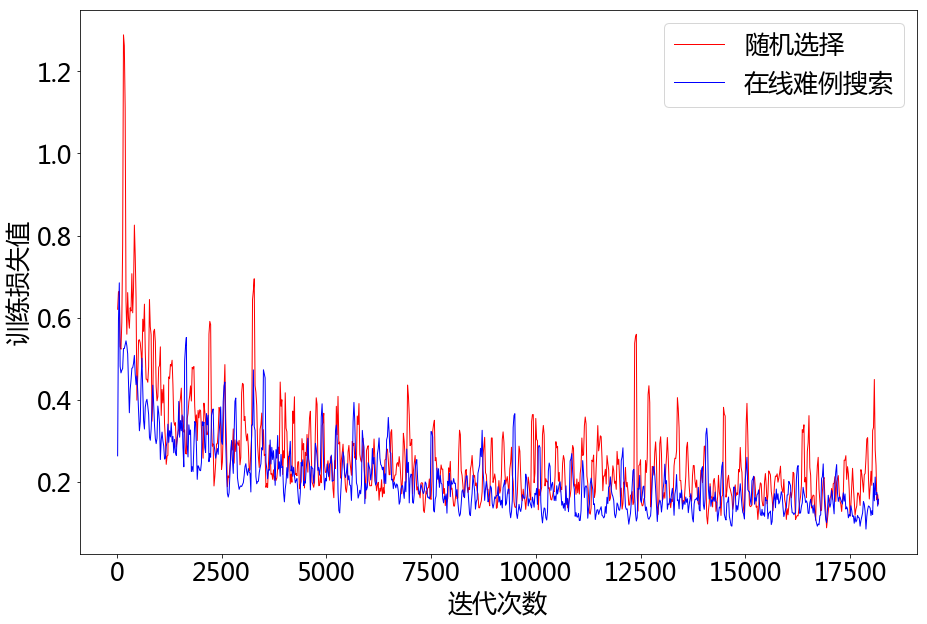

In [39]:
# python parse_log.py ??? ./
import matplotlib
import matplotlib.pyplot as plt
import random 
import numpy as np

def load_data(data_file, field_idx):
    data = [[] for _ in range(len(field_idx))]
    with open(data_file, 'r') as f:
        for line in f:
            line = line.strip()
            if line[0].isdigit():
                fields = line.split(',')
                for item in range(len(field_idx)):
                    data[item].append(float(fields[field_idx[item]].strip()))
    return data

def k_ave(arr, k):
    ret = []
    for i in range(k/2):
        ret.append(arr[i])
    for i in range(k/2, arr.shape[0]-k/2):
        ret.append(np.mean(arr[i-1:i+2]))
    for i in range(arr.shape[0]-k/2, arr.shape[0]):
        ret.append(arr[i])
    return ret
        
matplotlib.rcParams.update({'font.size': 25})
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
color = [[1,0,0], [0,0,1], [1,0,1],[1,1,1]]
label = [ u'随机选择', u'在线难例搜索']

plt.figure()
plt.rcParams["figure.figsize"] = [15,10]
# plt.title(u'不同网络的训练损失值比较')
plt.xlabel(u'迭代次数')
plt.ylabel(u'训练损失值')
# plt.yscale('log')


def random_process(data):
    temp = np.zeros(data.shape)
    for i in range(500):
        temp[i] = 0.1*np.exp(-i/721.0)
    for i in range(500, data.shape[0]):
        temp[i] = 0.05
    rd = 0.05*np.random.randn(*data.shape)
    return data

path_to_log_list = ['express_train_VGG16_4_multi_.txt.2019-02-21_20-23-24.train',
                   'express_train_VGG16_4_multi_roi_.txt.2019-02-21_16-22-38.train',
                   ]

path_to_log_list = ['/home/sheng/code/express/temp/'+item for item in path_to_log_list]
for i in [0,1]:
    ave_data = []
    data = load_data(path_to_log_list[i], [0,3,4,5,6])
    data = np.array(data)[:,:909]
    data = np.vstack((data[0], np.sum(data[1:,:], axis=0)))
    if i == 1:
        temp = random_process(data[1])
        ave_data = k_ave(temp, 3)
    else:
        ave_data = k_ave(data[1], 3)
    plt.plot(data[0], ave_data, label = label[i], color = color[i], linewidth = 1)

plt.legend(loc='upper right')
plt.savefig('./temp_pic/00.png',bbox_inches='tight', pad_inches = 0)
plt.show()

In [27]:

0.05*np.random.randn(10)

array([-0.10117212, -0.0155821 , -0.03457121, -0.02867928,  0.07390165,
       -0.02875177,  0.03225738,  0.10233367,  0.04449488,  0.00978533])

370387721817_20170509211547_y.jpg
bbox [[559 366 782 484]
 [541 761 770 864]]
label [array([1, 5, 5, 1, 5, 9, 3, 1, 7, 0, 5]), array([0, 9, 8, 3, 9, 2, 3, 3, 3, 7])]


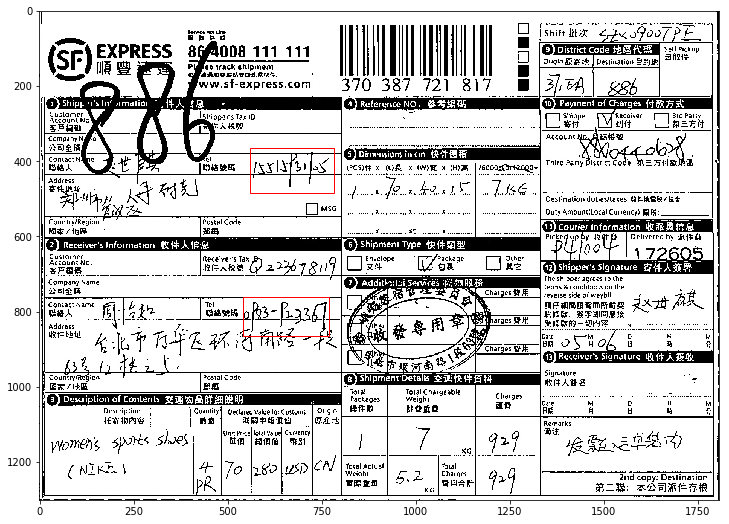

In [4]:
## train gt_roidb
import cPickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os

with open('./data/express/namelist_express.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('data/cache/express_train_gt_roidb.pkl', 'rb') as fid:
    gt_roidb = cPickle.load(fid)
    
index = 3
im = np.array(Image.open(os.path.join('data/express/dataset/',gt_roidb[index]['image'])))
print namelist[index]
fig, ax = plt.subplots(1)
ax.imshow(im)
# plt.figure(figsize=(100,100))
plt.rcParams["figure.figsize"] = [16,9]

bbox = gt_roidb[index]['boxes']
label = gt_roidb[index]['label']
print 'bbox', bbox
print 'label', label

for item in bbox:
    x1,y1,x2,y2 = item
    ax.add_patch(patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=1,edgecolor='r',facecolor='none'))

plt.show()

In [6]:
## test gt_roidb
## test det
import cPickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os

with open('./data/express/namelist_express.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('data/cache/express_test_gt_roidb.pkl', 'rb') as fid:
    gt_roidb = cPickle.load(fid)
with open('output/express_train/VGG16_4_multi/detections_25000.pkl', 'rb') as fid:
    det1 = cPickle.load(fid)
with open('output/express_train/VGG16_4_param1/detections_20000.pkl', 'rb') as fid:
    det2 = cPickle.load(fid)

In [7]:
len(gt_roidb)

1709

308477925027_20170509130249_y.jpg


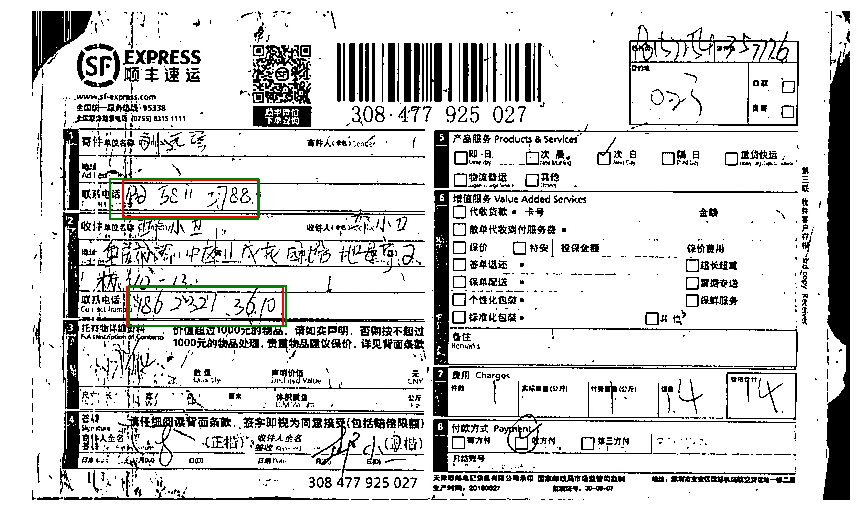

In [17]:
index = 16
im = np.array(Image.open(os.path.join('data/express/dataset/',gt_roidb[index]['image'])))
print gt_roidb[index]['image']
fig, ax = plt.subplots(1)
ax.imshow(im)
# plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = [16,9]
plt.axis('off')

# bbox = gt_roidb[index]['boxes']
# print 'bbox', bbox
# label = gt_roidb[index]['label']
# for item in bbox:
#     x1,y1,x2,y2 = item
#     ax.add_patch(patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=2,edgecolor='r',facecolor='none'))
    
pred = det1[1][index]
for item in pred[:2]:
    x1,y1,x2,y2,score = item
    ax.add_patch(patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=2,edgecolor='r',facecolor='none'))
#     ax.text(x1 -200, y1+18, '{:.4f}'.format(score),
#                     bbox=dict(facecolor='#4CAF50', linewidth=0),
#                     fontsize=20, color='white')
pred = det2[1][index]
for item in pred[:2]:
    x1,y1,x2,y2,score = item
    ax.add_patch(patches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=2,edgecolor='g',facecolor='none'))

plt.savefig('./temp_pic/01.png',bbox_inches='tight', pad_inches = 0)
plt.show()

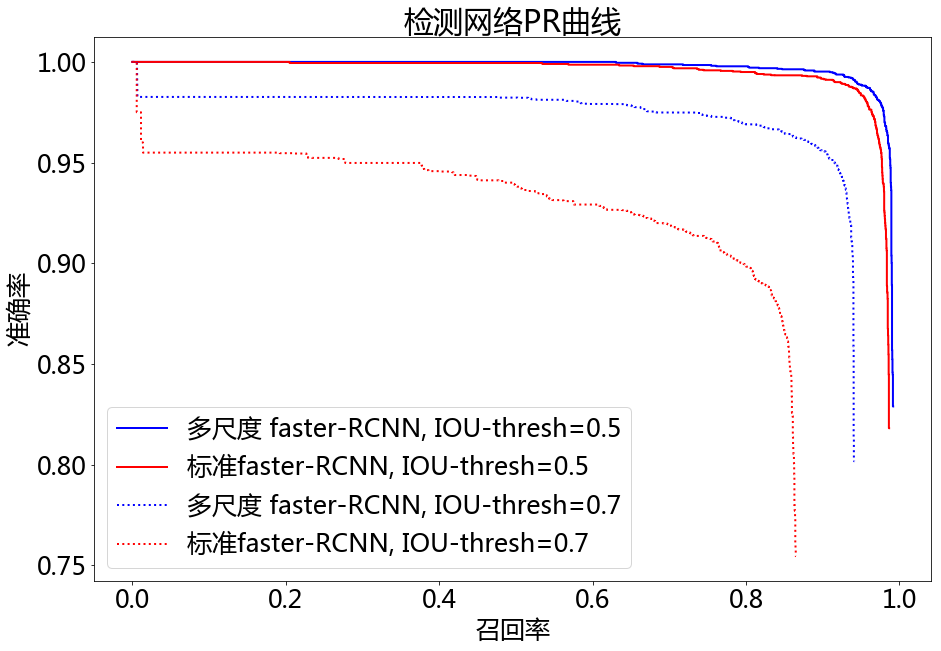

In [26]:
import matplotlib
import cPickle
from matplotlib import pyplot as plt

matplotlib.rcParams.update({'font.size': 25})
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams["figure.figsize"] = [15,10]

with open('output/express_test/evaluation.pkl', 'rb') as fid:
    eva = cPickle.load(fid)
precision, recall, threshold = eva['precision'], eva['recall'], eva['threshold']
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
plt.plot(recall, decreasing_max_precision, label = u'多尺度 faster-RCNN, IOU-thresh=0.5', color = [0,0,1], linewidth = 2)

with open('output/express_test/evaluation_0.5.pkl', 'rb') as fid:
    eva = cPickle.load(fid)
precision, recall, threshold = eva['precision'], eva['recall'], eva['threshold']
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
plt.plot(recall, decreasing_max_precision, label = u'标准faster-RCNN, IOU-thresh=0.5', color = [1,0,0], linewidth = 2)

with open('output/express_test/evaluation_multi_0.7.pkl', 'rb') as fid:
    eva = cPickle.load(fid)
precision, recall, threshold = eva['precision'], eva['recall'], eva['threshold']
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
plt.plot(recall, decreasing_max_precision, ':', label = u'多尺度 faster-RCNN, IOU-thresh=0.7', color = [0,0,1], linewidth = 2)

with open('output/express_test/evaluation_0.7.pkl', 'rb') as fid:
    eva = cPickle.load(fid)
precision, recall, threshold = eva['precision'], eva['recall'], eva['threshold']
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
plt.plot(recall, decreasing_max_precision, ':', label = u'标准faster-RCNN, IOU-thresh=0.7', color = [1,0,0], linewidth = 2)

plt.title(u'检测网络PR曲线')
plt.xlabel(u'召回率')
plt.ylabel(u'准确率')
plt.legend(loc='lower left')

plt.savefig('./temp_pic/00.png',bbox_inches='tight', pad_inches = 0)
plt.show()

In [1]:
import matplotlib
import cPickle
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif']=['Microsoft YaHei']

with open('output/express_test/evaluation.pkl', 'rb') as fid:
    eva = cPickle.load(fid)
precision, recall, threshold = eva['precision'], eva['recall'], eva['threshold']
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
plt.plot(recall, decreasing_max_precision, label = 'multiscale faster-RCNN, IOU-thresh=0.5', color = [0,0,0], linewidth = 2)

with open('output/express_test/evaluation_0.5.pkl', 'rb') as fid:
    eva = cPickle.load(fid)
precision, recall, threshold = eva['precision'], eva['recall'], eva['threshold']
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
plt.plot(recall, decreasing_max_precision, label = 'faster-RCNN, IOU-thresh=0.5', color = [0,1,0], linewidth = 2)

with open('output/express_test/evaluation_multi_0.7.pkl', 'rb') as fid:
    eva = cPickle.load(fid)
precision, recall, threshold = eva['precision'], eva['recall'], eva['threshold']
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
plt.plot(recall, decreasing_max_precision, label = 'multiscale faster-RCNN, IOU-thresh=0.7', color = [0,0,1], linewidth = 2)

with open('output/express_test/evaluation_0.7.pkl', 'rb') as fid:
    eva = cPickle.load(fid)
precision, recall, threshold = eva['precision'], eva['recall'], eva['threshold']
precision = precision[::-1]
recall = recall[::-1]
decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
plt.plot(recall, decreasing_max_precision, label = 'faster-RCNN, IOU-thresh=0.7', color = [1,0,0], linewidth = 2)

# plt.title('title here')
plt.xlabel(u'回归率Recall')
plt.ylabel(u'准确率Precision')
plt.legend(loc='lower left')

plt.savefig('./temp_pic/00.png',bbox_inches='tight', pad_inches = 0)
plt.show()

IOError: [Errno 2] No such file or directory: 'output/express_test/evaluation_0.5.pkl'

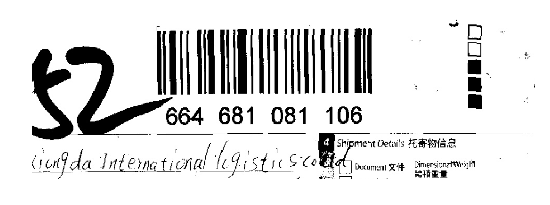

In [80]:
import cv2
from matplotlib import pyplot as plt
import os

def rotate(image, angle, center=None, scale=1.0):
    (h, w) = image.shape[:2]
    if center is None:
        center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

im = cv2.imread(os.path.join('data/express/dataset/664681081106_20170509202554_y.jpg'), 0)
im_scale = 1600 / float(im.shape[1])
im = cv2.resize(im, None, None, fx=im_scale, fy=im_scale, interpolation=cv2.INTER_LINEAR)

        
im = im[:300, 300:1200]
fig, ax = plt.subplots(1)
plt.rcParams["figure.figsize"] = [9,16]
plt.axis('off')
ax.imshow(im, cmap='gray')
plt.savefig('./temp_pic/00.png',bbox_inches='tight', pad_inches = 0)

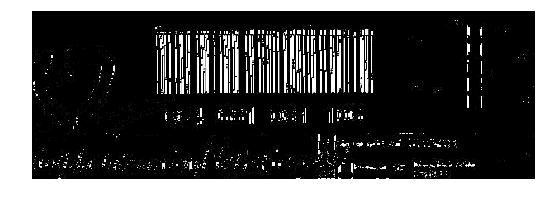

In [81]:
sobelx = cv2.Scharr(im, cv2.CV_16S, 1, 0)
sobely = cv2.Scharr(im, cv2.CV_16S, 0, 1)
absX = cv2.convertScaleAbs(sobelx)
absY = cv2.convertScaleAbs(sobely)
abs_X_sub_y = cv2.addWeighted(absX, 1, absY, -1, 0)
# abs_X_sub_y = cv2.addWeighted(absX, -1, absY, 1, 0)

fig, ax = plt.subplots(1)
plt.axis('off')
ax.imshow(abs_X_sub_y, cmap='gray')
plt.savefig('./temp_pic/01.png',bbox_inches='tight', pad_inches = 0)

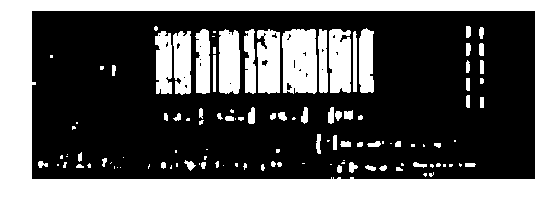

In [82]:
blur = cv2.blur(abs_X_sub_y, (7, 7))
ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)

fig, ax = plt.subplots(1)
plt.axis('off')
ax.imshow(thresh, cmap='gray')
plt.savefig('./temp_pic/02.png',bbox_inches='tight', pad_inches = 0)

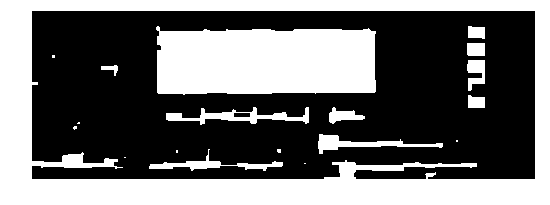

In [83]:
dst1 = cv2.dilate(thresh, cv2.getStructuringElement(cv2.MORPH_RECT, (10, 3)), iterations = 3)
dst1 = cv2.erode(dst1, cv2.getStructuringElement(cv2.MORPH_RECT, (10, 3)), iterations = 3)
# dst1 = cv2.dilate(thresh, cv2.getStructuringElement(cv2.MORPH_RECT, (3,10)), iterations = 3)
# dst1 = cv2.erode(dst1, cv2.getStructuringElement(cv2.MORPH_RECT, (3,10)), iterations = 3)

fig, ax = plt.subplots(1)
plt.axis('off')
ax.imshow(dst1, cmap='gray')
plt.savefig('./temp_pic/03.png',bbox_inches='tight', pad_inches = 0)

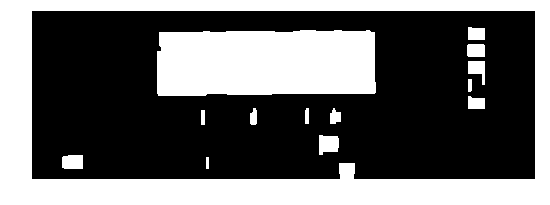

In [84]:
dst2 = cv2.erode(dst1, cv2.getStructuringElement(cv2.MORPH_RECT, (3,10)), iterations = 2)
dst2 = cv2.dilate(dst2, cv2.getStructuringElement(cv2.MORPH_RECT, (3,10)), iterations = 2)
# dst2 = cv2.erode(dst1, cv2.getStructuringElement(cv2.MORPH_RECT, (10,3)), iterations = 2)
# dst2 = cv2.dilate(dst2, cv2.getStructuringElement(cv2.MORPH_RECT, (10,3)), iterations = 2)

fig, ax = plt.subplots(1)
plt.axis('off')
ax.imshow(dst2, cmap='gray')
plt.savefig('./temp_pic/04.png',bbox_inches='tight', pad_inches = 0)

14


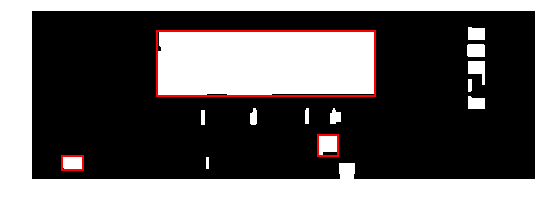

In [85]:
import matplotlib.patches as patches
image, contours, hierarchy = cv2.findContours(dst2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
area = []
for i in range(len(contours)):
    area.append(cv2.contourArea(contours[i]))
print(len(area))
area_sort = [(i, area[i]) for i in range(len(area))]
area_sort = sorted(area_sort, key=lambda x: x[1])[::-1]

fig, ax = plt.subplots(1)
plt.axis('off')
dst_color = cv2.cvtColor(dst2, cv2.COLOR_GRAY2RGB)
ax.imshow(dst_color)
for i in range(3):
    ind = area_sort[i][0]
    x,y,w,h = cv2.boundingRect(contours[ind])
    ax.add_patch(patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='r',facecolor='none'))
plt.savefig('./temp_pic/05.png',bbox_inches='tight', pad_inches = 0)

308816861860_20170509125323_y.jpg


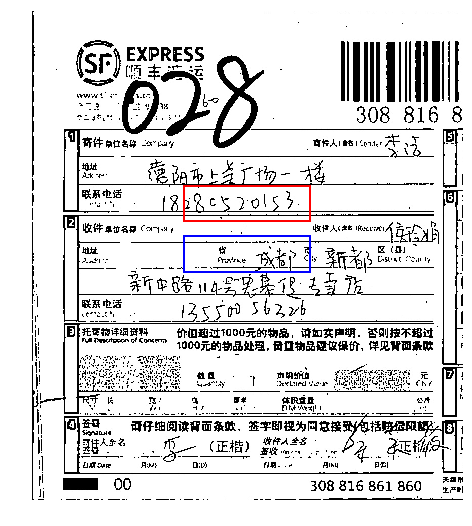

In [4]:
## train gt_roidb
import cPickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os

plt.rcParams["figure.figsize"] = [16,9]

with open('./data/express/namelist_express.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('data/cache/express_train_gt_roidb.pkl', 'rb') as fid:
    gt_roidb = cPickle.load(fid)
    
index = 4
im = np.array(Image.open(os.path.join('data/express/dataset/',gt_roidb[index]['image'])))
print namelist[index]
fig, ax = plt.subplots(1)
plt.axis('off')
ax.imshow(im[:,:850])

ax.add_patch(patches.Rectangle((300,346),250,70,linewidth=2,edgecolor='r',facecolor='none'))
ax.add_patch(patches.Rectangle((300,446),250,70,linewidth=2,edgecolor='b',facecolor='none'))

plt.savefig('./temp_pic/03.png',bbox_inches='tight', pad_inches = 0)